# MAchine Learning and Statistices 
# Project 2019
### Student:    David O'Brien
### Student ID: G00364766  

## Boston House Prices Dataset

In [64]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss


sns.__version__


'0.8.1'

# Describe
Use descriptive statistics and plots to describe the Boston house prices.  Tell us about the Boston house price data set. Tables and plots.  Pick out the interesting parst of dataset i.e. this is the key variable and whats going on with it.  Some plots will be important, others wont

Simple Linear Regression – get best fit line, use model to predict the value of houses https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d
https://levelup.gitconnected.com/predict-boston-house-prices-using-python-linear-regression-90469e0a341
Calculate the cost – measure the error of our model.  
https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2




# Exploring the Dataset

Variable | Description
-----|------
crim | per capita crime rate by town
zn | proportion of residential land zoned for lots over 25,000 sq.ft.
indus | proportion of non-retail business acres per town
chas | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
nox | nitrogen oxides concentration (parts per 10 million)
rm | average number of rooms per dwelling
age | proportion of owner-occupied units built prior to 1940
dis | weighted mean of distances to five Boston employment centres
rad | index of accessibility to radial highways
tax | full-value property-tax rate per $10,000
ptratio | pupil-teacher ratio by town
black | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
lstat | lower status of the population (percent)
medv | median value of owner occupied home in thousands

There are some assumptions we would naturally expect from the above dataset.  For example:
 - Neighbourhoods with a higher crime rate would have lower value houses
 - Neighbourhoods close to the Charles rive would have more expensive houses
 - Neighbourhoods with high average room numbers per dwelling would have more expensive houses
 
Below, we will look to see if these assumptions are correct.
 

In [60]:
# load data set and add column headers
df = pd.read_csv("bostondata.csv")

In [22]:
np.polyfit(df.medv, df.crim, 1)

array([-0.36315992, 11.79653575])

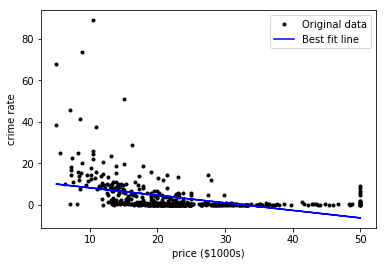

In [23]:
# Plot the best fit line
plt.plot(df.medv, df.crim, 'k.', label='Original data')
plt.plot(df.medv, -0.36315992 * df.medv + 11.79653575, 'b-', label='Best fit line')
plt.xlabel('price ($1000s)')
plt.ylabel('crime rate')
plt.legend()
plt.show()

In [24]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
df[0:5] # show the first five rows of data to confirm that the data has loaded correctly

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# A summary of the main statistics are shown in the table below.
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


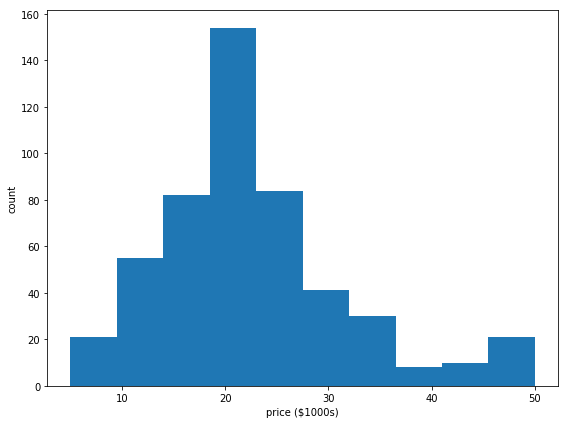

In [6]:
# Plot the distribution of the vedv variable
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df.medv)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


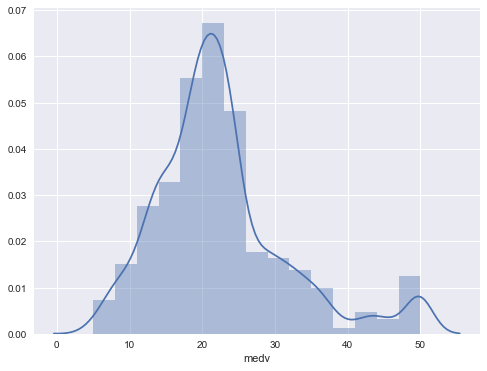

In [7]:
# plot a nicer looking graph using seaborn. Adapted from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(df['medv'], bins=15)
plt.show()


Below, I have created a pair plot that details pairwise relationships in the data set.  There is a lot of information on this graph, but allows me to quickly spot any 

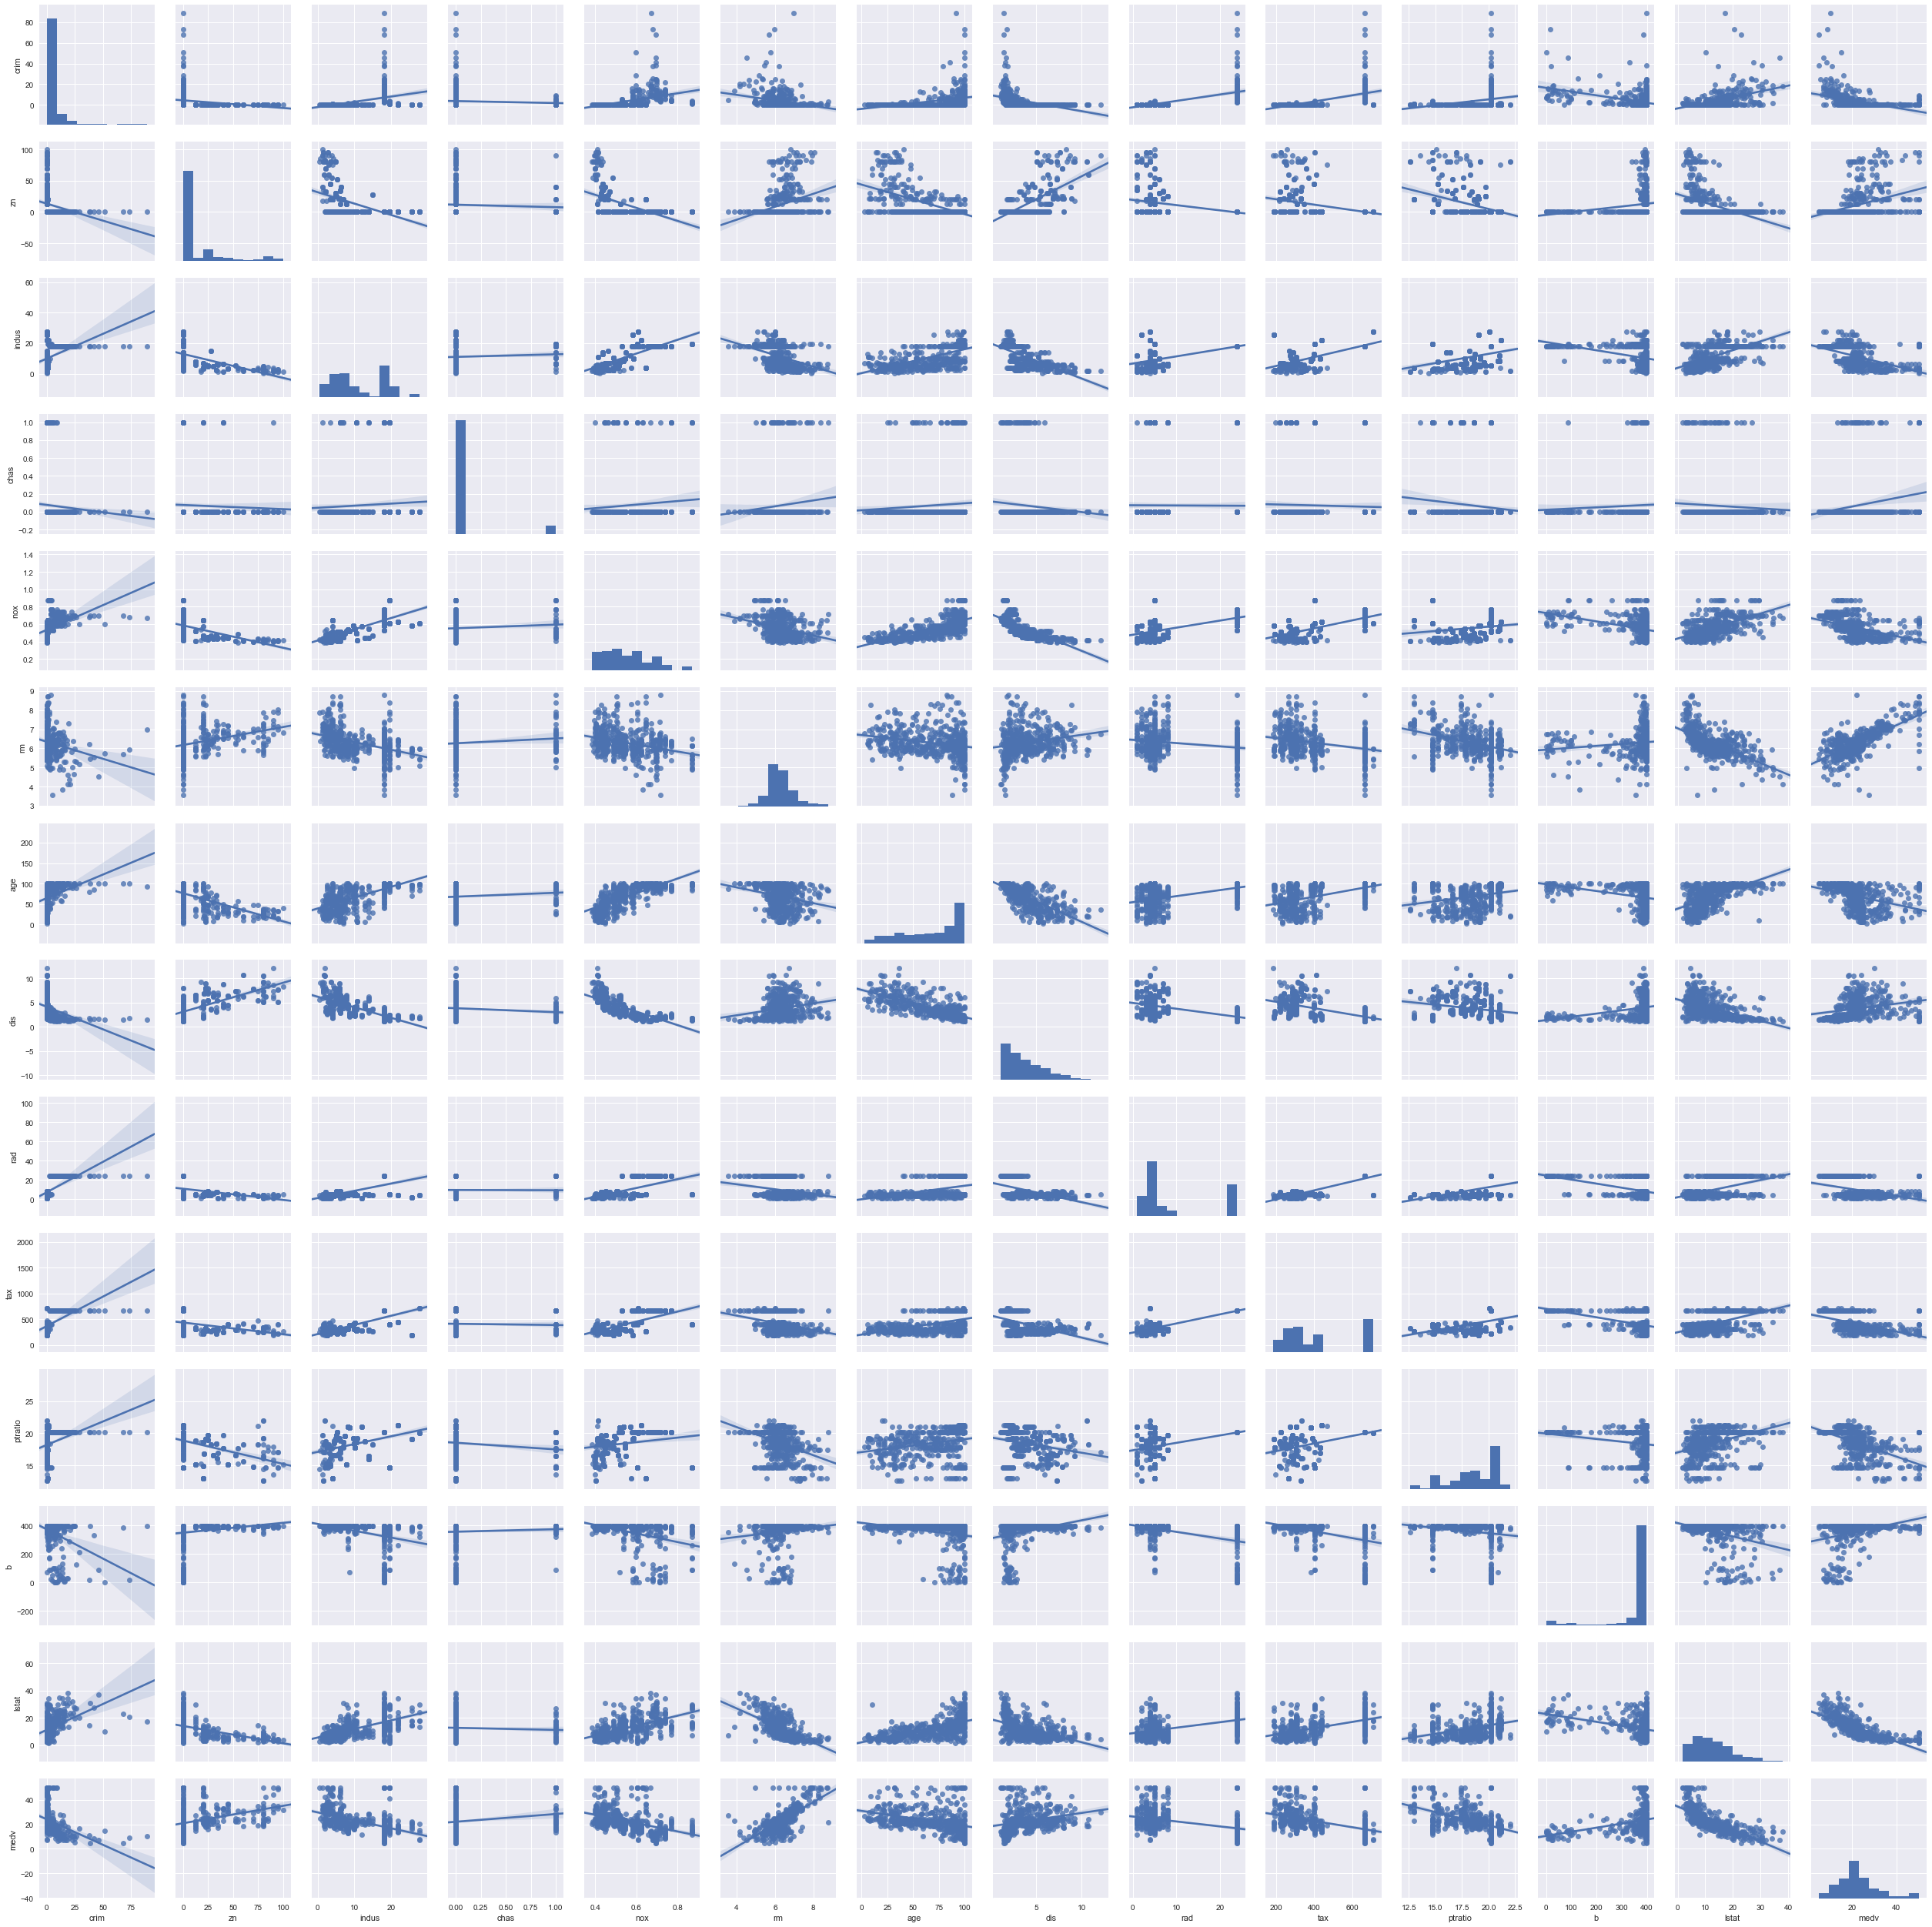

In [8]:
# plot pairwise relationships in the dataset fitting linear regression models to the scatter plots
sns.pairplot(df, kind="reg") 

Too much information in the graph above, but useful for having a quick glance at the pairwise relationships in the dataset.  Focus on certain variables below

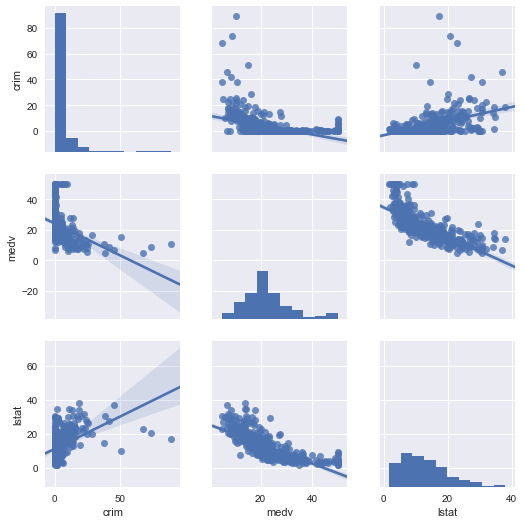

In [9]:
# plot pairwise relationships in the dataset fitting linear regression models to the scatter plots
sns.pairplot(df, vars=["crim", "medv","lstat"], kind="reg") 

# Infer
Is there a difference between house prices between houses along the river, and houses that are not. Discuss the findings within the notebook.  Use inferential statistics to analyse this.
- Correlations
- Chi-square test
- McNemars test
- Independent t-test
- Paired sample t-test
- Welch's t-test
- Wilcoxon signed-rank test
- Linear regression
- Logistic regression
- One-way analysis of variance (ANOVA)
- Two-way/N-way ANOVA

The variables we are interested in here are "chas" and "medv".

## Independent T-Test
Lets carry out an independent T-Test to see if the mean of house prices along the river are the same as houses that are not along the river


In [38]:
# lets look at the data in the chas and medv variables
df[['chas','medv']]

,chas,medv
0,0,24.0
1,0,21.6
2,0,34.7
3,0,33.4
4,0,36.2
5,0,28.7
6,0,22.9
7,0,27.1
8,0,16.5
9,0,18.9


In [43]:
#lets look at medv variable in the neighbourhoods that are along the Charles river - value is 1
df[df['chas'] == 1]['medv']

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: medv, dtype: float64

In [47]:
#lets look at medv variable in the neighbourhoods that are NOT along the Charles river - value is 0
df[df['chas'] == 0]['medv']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 471, dtype: float64

In [48]:
#lets try an independent t-test on this data
ss.ttest_ind(df[df['chas'] == 1]['medv'], df[df['chas'] == 0]['medv'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

The pvalue calculated above is very low indicating that the mean values are NOT the same

In [61]:
# lets do a plot of the data above
sns.catplot(x="chas", y="medv", data=df);

AttributeError: module 'seaborn' has no attribute 'catplot'

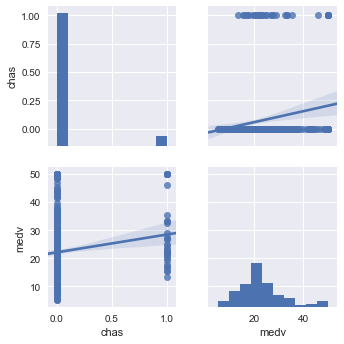

In [10]:
# plot pairwise relationships in the dataset fitting linear regression models to the scatter plots
sns.pairplot(df, vars=["chas", "medv"], kind="reg") 

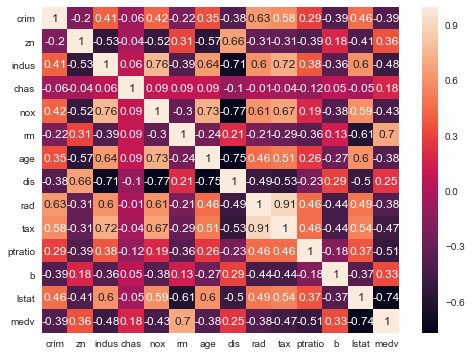

In [11]:
# adapted from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Predict
Is there a difference between house prices between houses along the river, and houses that are not. Discuss the findings within the notebook.  Use inferential statistics to analyse this.

## References

1 - https://github.com/selva86/datasets/blob/master/BostonHousing.csv

2 - https://www.kaggle.com/c/boston-housing

3 - https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html

4 - https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

5 - https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

6 - https://pythonfordatascience.org/inferential-statistics/

7 - 

8 - 

9 - 

10 - 

11 - 
